# Introduction to Bayesian Inference via Grid Approximation

With Julia!

In [50]:
include("bayes_util.jl")

linear_regression_1 (generic function with 1 method)

In [51]:
using Plots

Here we'll define the probability density function for the normal distribution. We'll use this later to calculate the likelihood for Bayes rule.

# Simple Linear Regression 
Here we will simulate some data and try to recover our parameters.

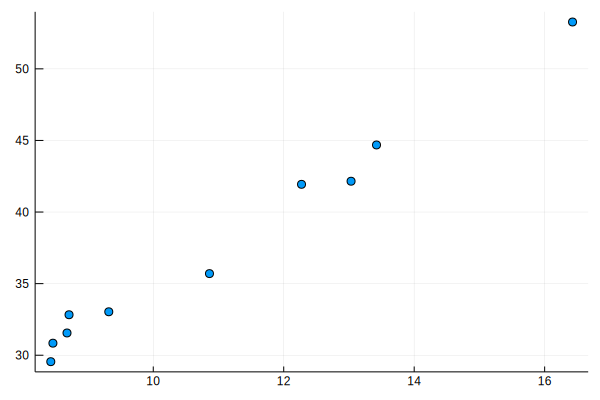

In [52]:
b0_true = 4
b1_true = 3
s_true = 2
num_observations = 10

x = 11 .+ randn(num_observations)*2
y = b0_true .+ b1_true*x .+ randn(length(x))*s_true;

scatter(x,y, legend=false)

In [53]:
x = [10.506, 13.9605, 10.0248, 9.21246, 13.5658, 12.2118, 12.5068, 15.1448, 11.0734, 14.3051] 
y = [37.7241, 47.5949, 30.2924, 33.1214, 43.6333, 38.6968, 43.5251, 49.5484, 39.088, 46.0416];

Setting up our "grid" for three parameters we are trying to infer

In [54]:
hyp_b0 = LinRange(3, 6, 101)
hyp_b1 = LinRange(2.5, 3.5, 101)
hyp_sig = LinRange(0.01, 4, 101);

In [55]:
posterior = linear_regression_1(x, y, hyp_b0, hyp_b1, hyp_sig); 

In [56]:
length(hypotheses)

UndefVarError: UndefVarError: hypotheses not defined

In [57]:
length(hyp_b0)*length(hyp_b1)*length(hyp_s)*length(x)

UndefVarError: UndefVarError: hyp_s not defined

In [58]:
val, idx = findmax(posterior[:,:,:])
idx

CartesianIndex(56, 47, 49)

In [59]:
println("MAP Estimate for b0 is: ", hyp_b0[idx[1]])
println("MAP Estimate for b1 is: ", hyp_b1[idx[2]])
println("MAP Estimate for sigma is: ", hyp_sig[idx[3]])

MAP Estimate for b0 is: 4.65
MAP Estimate for b1 is: 2.96
MAP Estimate for sigma is: 1.9252


In [60]:
p1 = plot(hyp_b0, prior[:,idx[2],idx[3]], title="Prior for b0")
p2 = plot(hyp_b1, prior[idx[1],:,idx[3]], title="Prior for b1")
p3 = plot(hyp_s, prior[idx[1],idx[2],:], title="Prior for s")
p4 = plot(hyp_b0, posterior[:,idx[2],idx[3]], title="Posterior for b0")
p5 = plot(hyp_b1, posterior[idx[1],:,idx[3]], title="Posterior for b1")
p6 = plot(hyp_s, posterior[idx[1],idx[2],:], title="Posterior for s")
plot(p1,p4,p2,p5,p3,p6, layout=(3,2), legend=false)

BoundsError: BoundsError: attempt to access 30×30×50×30 Array{Float64,4} at index [Base.Slice(Base.OneTo(30)), 47, 49]

In [61]:
A = [1 2 3; 3 4 5; 4 5 6]

3×3 Array{Int64,2}:
 1  2  3
 3  4  5
 4  5  6

In [62]:
B = cat([1 2; 3 4], [5 6; 7 8], dims=3)

2×2×2 Array{Int64,3}:
[:, :, 1] =
 1  2
 3  4

[:, :, 2] =
 5  6
 7  8

In [63]:
myWeightedSampler(collect(Iterators.flatten(posterior)))

UndefVarError: UndefVarError: myWeightedSampler not defined

# Multiple Linear Regression
Here I'm using exact data taken from an example from a pymc3 tutorial. We will try to recreate the same pymc3 results that use MCMC methods.

In [64]:
X1 = [-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ,
        0.73736858,  1.49073203, -0.93583387,  1.17582904, -1.25388067,
       -0.6377515 ,  0.9071052 , -1.4286807 , -0.14006872, -0.8617549 ,
       -0.25561937, -2.79858911, -1.7715331 , -0.69987723,  0.92746243,
       -0.17363568,  0.00284592,  0.68822271, -0.87953634,  0.28362732,
       -0.80536652, -1.72766949, -0.39089979,  0.57380586,  0.33858905,
       -0.01183049,  2.39236527,  0.41291216,  0.97873601,  2.23814334,
       -1.29408532, -1.03878821,  1.74371223, -0.79806274,  0.02968323,
        1.06931597,  0.89070639,  1.75488618,  1.49564414,  1.06939267,
       -0.77270871,  0.79486267,  0.31427199, -1.32626546,  1.41729905,
        0.80723653,  0.04549008, -0.23309206, -1.19830114,  0.19952407,
        0.46843912, -0.83115498,  1.16220405, -1.09720305, -2.12310035,
        1.03972709, -0.40336604, -0.12602959, -0.83751672, -1.60596276,
        1.25523737, -0.68886898,  1.66095249,  0.80730819, -0.31475815,
       -1.0859024 , -0.73246199, -1.21252313,  2.08711336,  0.16444123,
        1.15020554, -1.26735205,  0.18103513,  1.17786194, -0.33501076,
        1.03111446, -1.08456791, -1.36347154,  0.37940061, -0.37917643];

In [65]:
X2 = [ 0.12841094, -0.39557759,  0.14245293,  0.51966079, -0.0049252 ,
        0.00682843,  0.0359099 , -0.37239514,  0.08522933, -0.32108195,
       -0.08553592,  0.24857391, -0.14704339,  0.1002498 ,  0.20254781,
        0.05574817, -0.27418969, -0.06649506,  0.39188227, -0.40500915,
       -0.0551572 , -0.11042161,  0.02414947,  0.14964312,  0.32173819,
       -0.05404648,  0.16246827,  0.09994803,  0.09486946, -0.11278479,
       -0.19946429, -0.22000862, -0.15128744,  0.06433732,  0.15218988,
        0.06469377, -0.10979102,  0.36119402,  0.30377312, -0.07080002,
       -0.16468628,  0.02604299,  0.25345973,  0.066553  ,  0.11130974,
       -0.04241602,  0.09125418,  0.30890889, -0.04793376,  0.02866155,
        0.0507633 ,  0.05674507, -0.28237778, -0.37537373, -0.20393101,
        0.03358846,  0.11077123, -0.10613491,  0.2754515 , -0.02863519,
        0.0040632 , -0.03879277,  0.02680536,  0.14089481,  0.13313069,
       -0.17968459,  0.30473276, -0.21900529,  0.0158454 , -0.05487931,
       -0.20979834, -0.01502412, -0.14816275,  0.01458145,  0.08061719,
        0.29438587,  0.06147684, -0.12224507, -0.07832396,  0.02799562,
        0.01869217,  0.29191785,  0.27907059, -0.07178719, -0.10972843,
       -0.51141092, -0.10978408, -0.19561154, -0.07096489,  0.07831685,
        0.03543847, -0.0059936 ,  0.03991642, -0.02522355,  0.03940379,
       -0.646211  , -0.0538587 , -0.02217014, -0.06825234, -0.04358925];

In [66]:
Y = [ 9.38706859e-01,  4.10296149e-01,  3.83981292e+00,  1.48115418e+00,
        4.02779506e-01,  2.46184530e+00, -1.42342679e+00, -1.27520755e+00,
        2.38380704e+00, -3.90761758e-01,  6.86815665e-01,  2.10641559e+00,
        1.84890360e+00, -8.04359754e-01,  3.93284941e-01,  2.31721220e+00,
        3.41651416e+00,  3.39016804e+00,  2.22246532e+00,  3.77308673e-01,
        3.43806883e-01,  1.66274112e+00, -1.20663529e-01,  2.18829692e+00,
        1.50706675e+00, -1.19159361e+00,  1.44784359e+00, -1.55349860e+00,
       -1.40248284e-01, -1.96609652e-02, -1.35472064e+00, -1.59474188e+00,
       -1.39656749e+00,  5.29754386e-01,  2.63051387e+00,  5.53932221e-01,
        1.76084808e+00,  2.39686504e+00,  1.47396672e+00,  9.07514885e-01,
        7.37921664e-02, -3.82899347e-01,  1.49271947e+00,  7.65880501e-01,
        2.05273917e+00,  5.63172455e-01,  4.25098874e+00,  3.26909416e-02,
        3.93785393e-01,  3.67324277e+00,  1.69575050e+00,  9.38133214e-01,
        1.35531685e+00, -2.42854948e+00,  1.26254192e+00,  2.07270390e+00,
        2.75833869e+00,  2.60484762e+00,  3.21391580e+00,  4.95643013e+00,
        2.31319324e-01,  1.53863552e+00,  1.25983672e+00, -5.57565140e-01,
        3.74025866e+00,  1.00427073e+00,  2.44326467e+00,  5.03997740e-01,
        1.06029822e+00,  1.48250538e+00, -2.69441500e-01, -1.19520306e+00,
        3.20016631e+00, -6.69460228e-01, -2.24215995e+00,  2.10607318e+00,
        2.01495136e+00, -8.51855254e-01, -8.99821832e-01, -1.20278122e+00,
        1.05077792e+00, -1.43401688e-01,  1.84052098e+00,  1.16665281e+00,
        5.60119574e-02, -2.04696786e+00, -1.66062003e+00,  5.51783963e-01,
        1.58062230e+00,  1.63826706e+00,  1.16403511e+00,  3.85980814e-01,
        2.23665854e+00,  1.23718947e+00, -1.16021703e+00,  1.11137427e+00,
        1.65658589e+00, -3.20236525e-03,  1.36931418e+00,  1.33161104e+00];

Now we have four parameters that we will need grids for.

In [67]:
hyp_alpha = LinRange(0.5,1.3,30)
hyp_beta1 = LinRange(0.6,1.25,30)
hyp_beta2 = LinRange(0,5,50)
hyp_sigma = LinRange(0.8,1.3,30);  

In [68]:
prior = ones(length(hyp_alpha),length(hyp_beta1),length(hyp_beta2),length(hyp_sigma))
unnormalized_posterior = zeros(size(prior));

In [69]:
length(hyp_alpha)*length(hyp_beta1)*length(hyp_beta2)*length(hyp_sigma)*length(Y)

135000000

In [70]:
marginal_likelihood = 0
for i in 1:length(hyp_alpha)
    alpha = hyp_alpha[i]
    for j in 1:length(hyp_beta1)
        beta1 = hyp_beta1[j]
        for k in 1:length(hyp_beta2)
            beta2 = hyp_beta2[k]
            for l in 1:length(hyp_sigma)
                sigma = hyp_sigma[l]
                likelihood = 1
                for d in 1:length(Y)
                    mean = alpha + beta1*X1[d] + beta2*X2[d]
                    likelihood *= normal_pdf(Y[d], mean, sigma)
                end
                unnormalized_posterior[i,j,k,l] = likelihood*prior[i,j,k,l]
                marginal_likelihood += likelihood*prior[i,j,k,l]
            end
        end
    end
end
    
posterior = unnormalized_posterior/marginal_likelihood;

In [71]:
val, idx = findmax(posterior[:,:,:,:])
idx

CartesianIndex(16, 17, 27, 11)

In [72]:
println("Max Posterior Estimate for alpha is: ", hyp_alpha[idx[1]])
println("Max Posterior Estimate for beta1 is: ", hyp_beta1[idx[2]])
println("Max Posterior Estimate for beta2 is: ", hyp_beta2[idx[3]])
println("Max Posterior Estimate for sigma is: ", hyp_sigma[idx[4]])

Max Posterior Estimate for alpha is: 0.913793103448276
Max Posterior Estimate for beta1 is: 0.9586206896551724
Max Posterior Estimate for beta2 is: 2.653061224489796
Max Posterior Estimate for sigma is: 0.9724137931034484


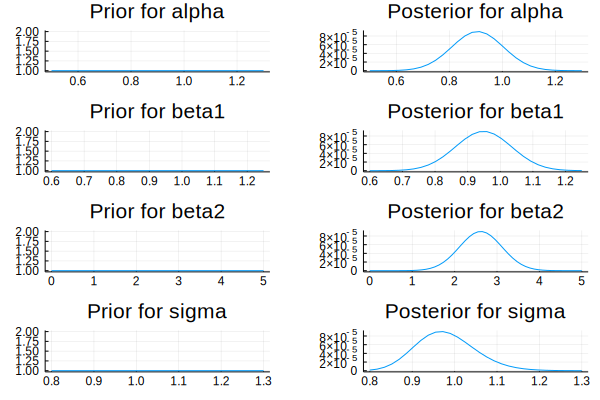

In [73]:
p1 = plot(hyp_alpha, prior[:,idx[2],idx[3],idx[4]], title="Prior for alpha")
p2 = plot(hyp_beta1, prior[idx[1],:,idx[3],idx[4]], title="Prior for beta1")
p3 = plot(hyp_beta2, prior[idx[1],idx[2],:,idx[4]], title="Prior for beta2")
p4 = plot(hyp_sigma, prior[idx[1],idx[2],idx[3],:], title="Prior for sigma")

p5 = plot(hyp_alpha, posterior[:,idx[2],idx[3],idx[4]], title="Posterior for alpha")
p6 = plot(hyp_beta1, posterior[idx[1],:,idx[3],idx[4]], title="Posterior for beta1")
p7 = plot(hyp_beta2, posterior[idx[1],idx[2],:,idx[4]], title="Posterior for beta2")
p8 = plot(hyp_sigma, posterior[idx[1],idx[2],idx[3],:], title="Posterior for sigma")

plot(p1,p5,p2,p6,p3,p7,p4,p8, layout=(4,2), legend=false)

In [74]:
rand()

0.17422782606358633

In [75]:
wv = [0.1,0.1,0.5,0.1,0.1,0.1]

6-element Array{Float64,1}:
 0.1
 0.1
 0.5
 0.1
 0.1
 0.1

In [83]:
weighted_sampler(wv)

1

In [84]:
vector = zeros(1000000)
for i in 1:length(vector)
    vector[i] = weighted_sampler(wv)
end    

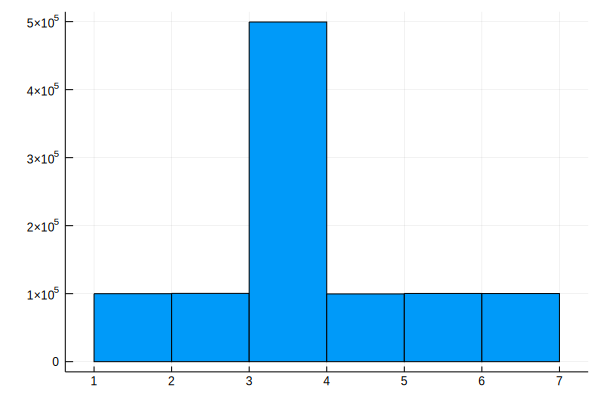

In [85]:
histogram(vector, bins=5, legend=false)

# Time series

In [79]:
theta = 1.6
mu = 4
x = zeros(100)
for t in 1:length(x)
    x[t] = mu + theta*randn()
end

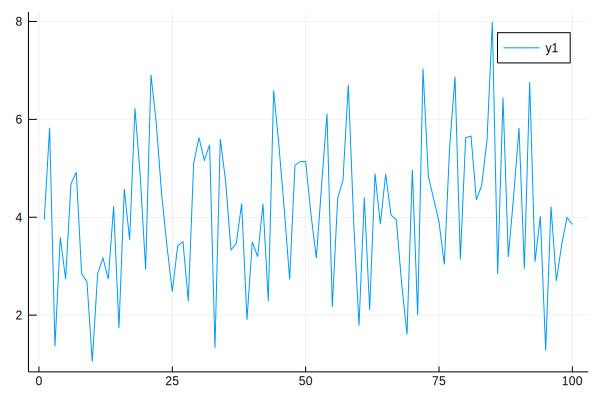

In [80]:
plot(x)

## AR1 Process

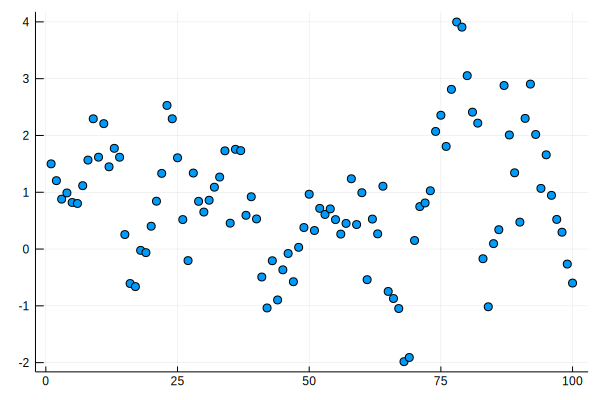

In [81]:
phi = 0.9
sigma = 0.8
x = zeros(100)
x[1] = 1.5
for t in 2:length(x)
    x[t] = phi*x[t-1] + sigma*randn()
end

scatter(x, legend=false)

# Sampling from the posterior 

(under construction)

In [82]:
i = rand(1:length(hyp_b0))
j = rand(1:length(hyp_b1))
k = rand(1:length(hyp_s))

posterior[i,j,k]



UndefVarError: UndefVarError: hyp_s not defined